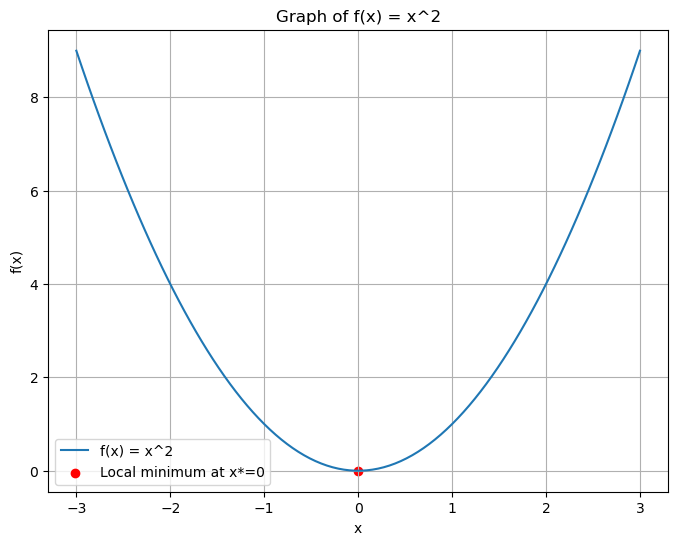

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Định nghĩa hàm số f(x) = x^2
def f(x):
    return x**2

# Tạo dải giá trị x từ -3 đến 3
x = np.linspace(-3, 3, 100)

# Tính giá trị của hàm số tương ứng với các giá trị x
y = f(x)

# Vẽ đồ thị hàm số
plt.figure(figsize=(8, 6))
plt.plot(x, y, label='f(x) = x^2')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Graph of f(x) = x^2')

# Đánh dấu điểm cực tiểu x*
plt.scatter(0, f(0), color='red', label='Local minimum at x*=0')
plt.legend()
plt.grid(True)
plt.show()


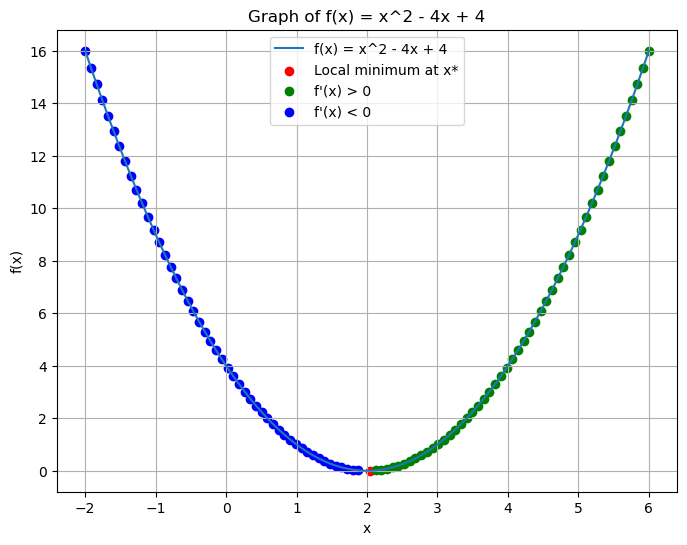

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Định nghĩa hàm số f(x) = x^2 - 4x + 4 (ví dụ hàm số bậc hai khác)
def f(x):
    return x**2 - 4*x + 4

# Đạo hàm của hàm số f(x)
def f_prime(x):
    return 2*x - 4

# Tạo dải giá trị x từ -2 đến 6
x = np.linspace(-2, 6, 100)

# Tính giá trị của hàm số tương ứng với các giá trị x
y = f(x)

# Tính đạo hàm của hàm số tại các điểm x
y_prime = f_prime(x)

# Lọc ra các điểm có đạo hàm > 0 và < 0
positive_gradient_x = x[y_prime > 0.1]
positive_gradient_y = f(positive_gradient_x)
negative_gradient_x = x[y_prime < -0.1]
negative_gradient_y = f(negative_gradient_x)

# Tìm điểm cực tiểu (đạo hàm bằng 0)
min_x = x[np.argmin(y)]
min_y = np.min(y)

# Vẽ đồ thị hàm số
plt.figure(figsize=(8, 6))
plt.plot(x, y, label='f(x) = x^2 - 4x + 4')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Graph of f(x) = x^2 - 4x + 4')

# Đánh dấu điểm cực tiểu x* màu đỏ
plt.scatter(min_x, min_y, color='red', label='Local minimum at x*')

# Đánh dấu các điểm có đạo hàm > 0 và < 0
plt.scatter(positive_gradient_x, positive_gradient_y, color='green', label='f\'(x) > 0')
plt.scatter(negative_gradient_x, negative_gradient_y, color='blue', label='f\'(x) < 0')

plt.legend()
plt.grid(True)
plt.show()


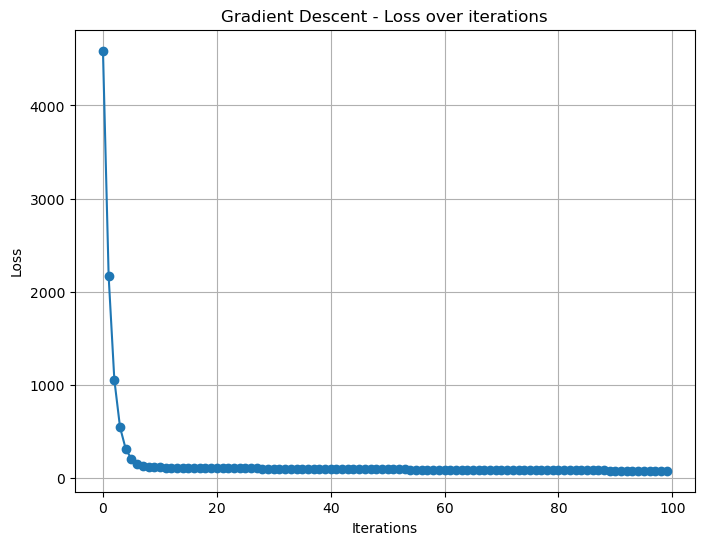

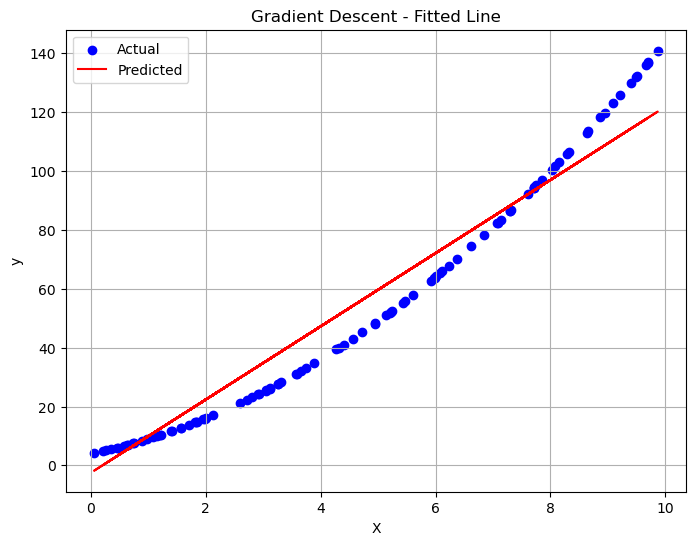

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Hàm tạo dữ liệu mẫu
def generate_data(num_samples=100):
    np.random.seed(42)
    X = np.random.rand(num_samples, 1) * 10
    # y = 2 * X + 1 + np.random.randn(num_samples, 1) * 2  # Hàm thực tế: y = 2*X + 1 + noise
    y = X**2 + 4*X + 4
    return X, y

# Hàm Gradient Descent
def gradient_descent(X, y, learning_rate=0.01, iterations=100):
    num_samples = len(y)
    num_features = X.shape[1]
    
    # Khởi tạo weights và bias ban đầu
    weights = np.zeros((num_features, 1))
    bias = 0
    
    # Dùng để lưu trữ giá trị loss sau mỗi lần cập nhật weights và bias
    loss_history = []
    
    for i in range(iterations):
        # Tính đầu ra dự đoán
        y_pred = np.dot(X, weights) + bias
        
        # Tính độ lỗi
        error = y_pred - y
        
        # Tính đạo hàm theo weights và bias
        gradient_weights = (1/num_samples) * np.dot(X.T, error)
        gradient_bias = (1/num_samples) * np.sum(error)
        
        # Cập nhật weights và bias
        weights -= learning_rate * gradient_weights
        bias -= learning_rate * gradient_bias
        
        # Tính loss và lưu vào history
        loss = np.mean(np.square(error))
        loss_history.append(loss)
        
    return weights, bias, loss_history

# Tạo dữ liệu mẫu
X, y = generate_data()

# Thêm cột 1 cho bias
X_with_bias = np.c_[np.ones((len(X), 1)), X]

# Áp dụng Gradient Descent
learned_weights, learned_bias, loss_history = gradient_descent(X_with_bias, y)

# Vẽ đồ thị loss theo số lần iterations
plt.figure(figsize=(8, 6))
plt.plot(range(len(loss_history)), loss_history, marker='o', linestyle='-')
plt.title('Gradient Descent - Loss over iterations')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

# Vẽ đồ thị dữ liệu và đường tối ưu hóa được học từ Gradient Descent
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', label='Actual')
plt.plot(X, np.dot(X_with_bias, learned_weights) + learned_bias, color='red', label='Predicted')
plt.title('Gradient Descent - Fitted Line')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()


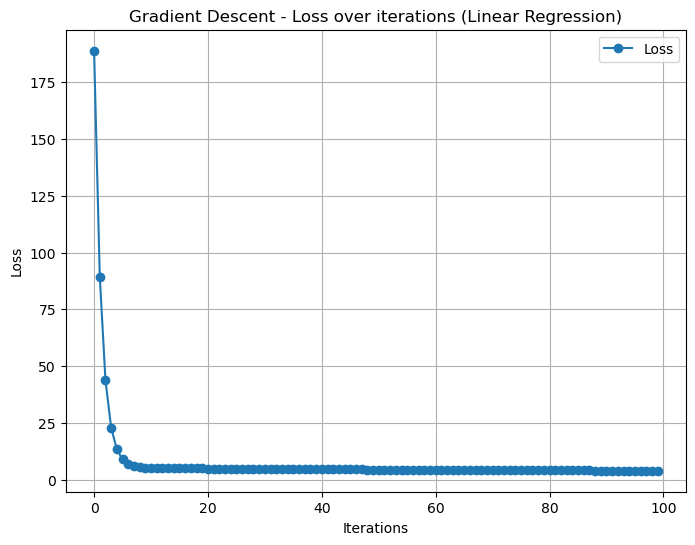

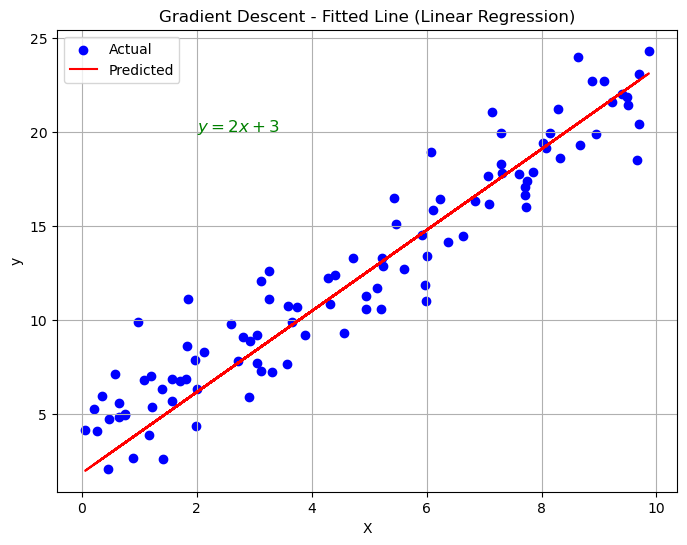

In [31]:
import numpy as np
import matplotlib.pyplot as plt

# Hàm tạo dữ liệu mẫu cho Linear Regression
def generate_data_linear(num_samples=100):
    np.random.seed(42)
    X = np.random.rand(num_samples, 1) * 10
    noise = np.random.randn(num_samples, 1) * 2  # Nhiễu ngẫu nhiên
    y = 2 * X + 3 + noise  # Hàm thực tế: y = 2*X + 3 + noise
    return X, y

# Hàm Gradient Descent cho Linear Regression
def gradient_descent_linear(X, y, learning_rate=0.01, iterations=100):
    num_samples = len(y)
    num_features = X.shape[1]
    
    # Khởi tạo weights và bias ban đầu
    weights = np.zeros((num_features, 1))
    bias = 0
    
    # Dùng để lưu trữ giá trị loss sau mỗi lần cập nhật weights và bias
    loss_history = []
    
    for i in range(iterations):
        # Tính đầu ra dự đoán
        y_pred = np.dot(X, weights) + bias
        
        # Tính độ lỗi
        error = y_pred - y
        
        # Tính đạo hàm theo weights và bias
        gradient_weights = (1/num_samples) * np.dot(X.T, error)
        gradient_bias = (1/num_samples) * np.sum(error)
        
        # Cập nhật weights và bias
        weights -= learning_rate * gradient_weights
        bias -= learning_rate * gradient_bias
        
        # Tính loss và lưu vào history
        loss = np.mean(np.square(error))
        loss_history.append(loss)
        
    return weights, bias, loss_history

# Tạo dữ liệu mẫu
X, y = generate_data_linear()

# Thêm cột 1 cho bias
X_with_bias = np.c_[np.ones((len(X), 1)), X]

# Áp dụng Gradient Descent cho Linear Regression
learned_weights, learned_bias, loss_history = gradient_descent_linear(X_with_bias, y)

# Vẽ đồ thị loss theo số lần iterations
plt.figure(figsize=(8, 6))
plt.plot(range(len(loss_history)), loss_history, marker='o', linestyle='-', label='Loss')
plt.title('Gradient Descent - Loss over iterations (Linear Regression)')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Vẽ đồ thị dữ liệu và đường tối ưu hóa được học từ Gradient Descent (Linear Regression)
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', label='Actual')
plt.plot(X, np.dot(X_with_bias, learned_weights) + learned_bias, color='red', label='Predicted')
plt.title('Gradient Descent - Fitted Line (Linear Regression)')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.text(2, 20, r'$y = 2x + 3$', fontsize=12, color='green')
plt.show()


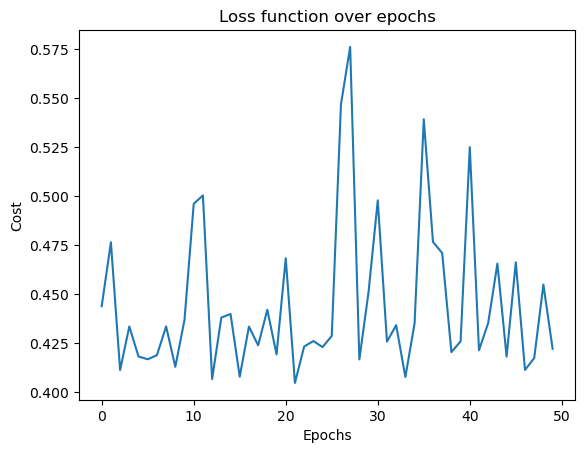

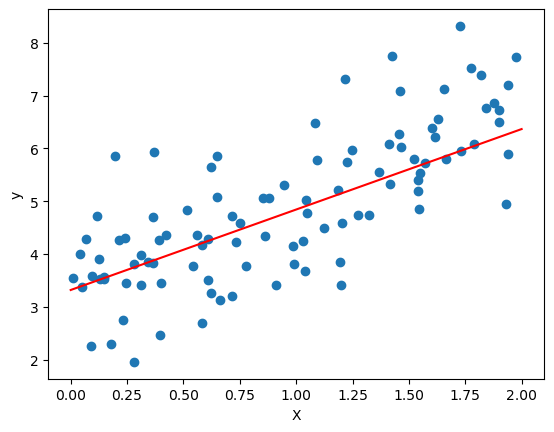

In [39]:
import numpy as np
import matplotlib.pyplot as plt

# Tạo dữ liệu giả định
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 2 * X + 3 + np.random.randn(100, 1)  # Hàm thực tế: y = 2*X + 3 + noise


# Thêm cột 1 vào X để tính toán theta0
X_b = np.c_[np.ones((100, 1)), X]

# Số lần lặp và learning rate
epochs = 50
eta = 0.1

# Khởi tạo ngẫu nhiên theta
theta = np.random.randn(2,1)

# Hàm tính loss function
def compute_cost(theta, X, y):
    m = len(y)
    predictions = X.dot(theta)
    cost = (1/(2*m)) * np.sum(np.square(predictions - y))
    return cost

# Stochastic Gradient Descent và lưu giá trị loss function
cost_history = []
for epoch in range(epochs):
    for i in range(len(X)):
        random_index = np.random.randint(len(X))
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = xi.T.dot(xi.dot(theta) - yi)
        theta = theta - eta * gradients

    # Tính và lưu giá trị loss function sau mỗi epoch
    cost = compute_cost(theta, X_b, y)
    cost_history.append(cost)

# Vẽ đồ thị loss function
plt.plot(range(epochs), cost_history)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Loss function over epochs')
plt.show()

# Vẽ đường fitting
plt.scatter(X, y)
plt.xlabel('X')
plt.ylabel('y')

x_vals = np.array([[0], [2]]) # Tạo 2 điểm để vẽ đường thẳng
x_vals_b = np.c_[np.ones((2, 1)), x_vals]
y_predict = x_vals_b.dot(theta)
plt.plot(x_vals, y_predict, 'r-')
plt.show()

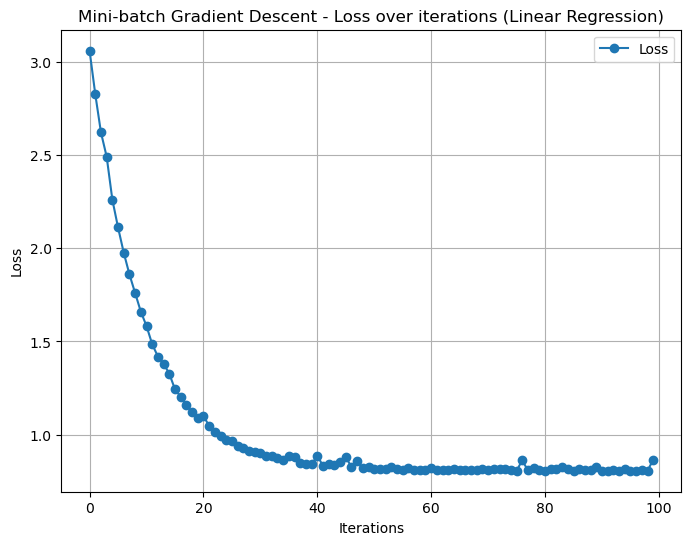

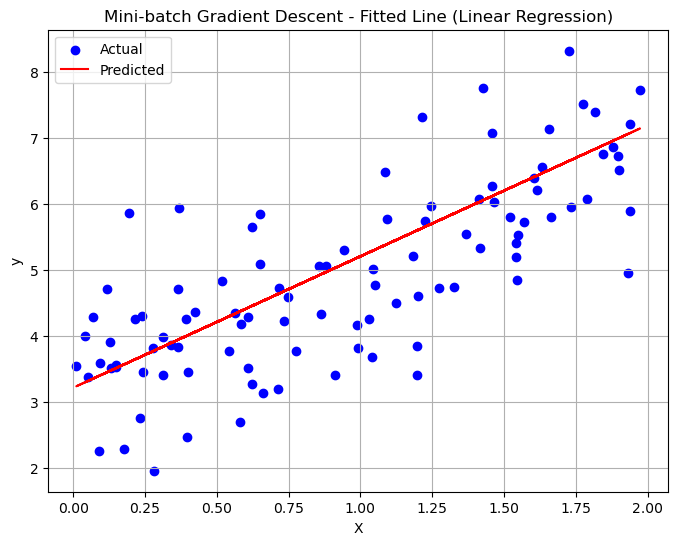

In [45]:
# Hàm Mini-batch Gradient Descent cho Linear Regression
def minibatch_gradient_descent(X, y, learning_rate=0.01, iterations=100, batch_size=10):
    num_samples = len(y)
    num_features = X.shape[1]
    loss_history = []

    # Khởi tạo weights và bias ban đầu
    weights = np.zeros((num_features, 1))
    bias = 0
    
    for i in range(iterations):
        # Xáo trộn dữ liệu trước mỗi epoch
        indices = np.random.permutation(num_samples)
        X_shuffled = X[indices]
        y_shuffled = y[indices]

        for j in range(0, num_samples, batch_size):
            # Chia dữ liệu thành mini-batch
            X_mini = X_shuffled[j:j+batch_size]
            y_mini = y_shuffled[j:j+batch_size]

            # Tính đầu ra dự đoán
            y_pred = np.dot(X_mini, weights) + bias

            # Tính độ lỗi
            error = y_pred - y_mini

            # Tính đạo hàm theo weights và bias
            gradient_weights = (1 / len(y_mini)) * np.dot(X_mini.T, error)
            gradient_bias = (1 / len(y_mini)) * np.sum(error)

            # Cập nhật weights và bias
            weights -= learning_rate * gradient_weights
            bias -= learning_rate * gradient_bias

        # Tính loss và lưu vào history
        y_pred = np.dot(X, weights) + bias
        loss = np.mean(np.square(y_pred - y))
        loss_history.append(loss)

    return weights, bias, loss_history

# Áp dụng Mini-batch Gradient Descent cho Linear Regression
learned_weights_mb, learned_bias_mb, loss_history_mb = minibatch_gradient_descent(X_with_bias, y)

# Vẽ đồ thị loss theo số lần iterations
plt.figure(figsize=(8, 6))
plt.plot(range(len(loss_history_mb)), loss_history_mb, marker='o', linestyle='-', label='Loss')
plt.title('Mini-batch Gradient Descent - Loss over iterations (Linear Regression)')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Vẽ đồ thị dữ liệu và đường tối ưu hóa được học từ Mini-batch Gradient Descent (Linear Regression)
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', label='Actual')
plt.plot(X, np.dot(X_with_bias, learned_weights_mb) + learned_bias_mb, color='red', label='Predicted')
plt.title('Mini-batch Gradient Descent - Fitted Line (Linear Regression)')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid(True)
# plt.text(2, 20, r'$y = 2x + 3$', fontsize=12, color='green')
plt.show()


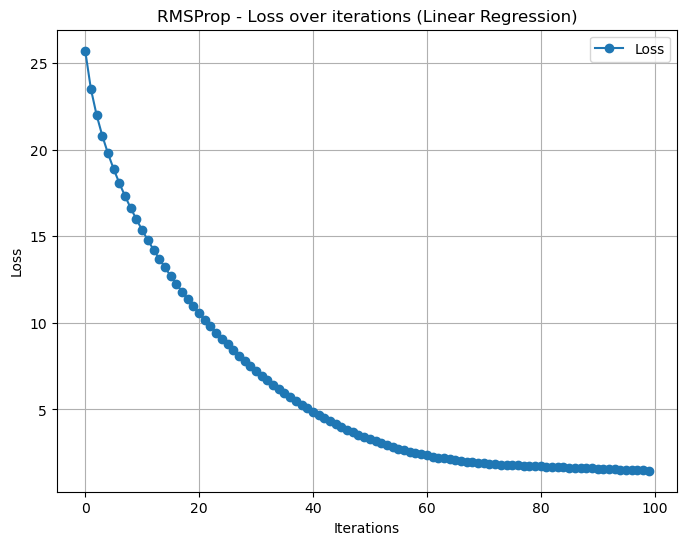

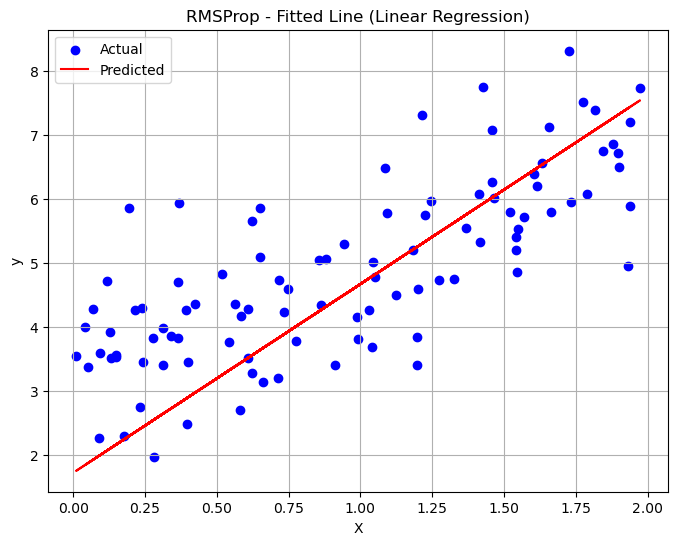

In [47]:
def rmsprop(X, y, learning_rate=0.01, iterations=100, gamma=0.9, epsilon=1e-8):
    num_samples = len(y)
    num_features = X.shape[1]
    loss_history = []

    weights = np.zeros((num_features, 1))
    bias = 0
    
    # Initialize E[g^2]_t
    E_grad_squared = np.zeros((num_features, 1))
    E_bias_squared = 0
    
    for i in range(iterations):
        y_pred = np.dot(X, weights) + bias
        error = y_pred - y
        
        gradient_weights = (1 / num_samples) * np.dot(X.T, error)
        gradient_bias = (1 / num_samples) * np.sum(error)
        
        # Update E[g^2]_t and E[b^2]_t
        E_grad_squared = gamma * E_grad_squared + (1 - gamma) * gradient_weights**2
        E_bias_squared = gamma * E_bias_squared + (1 - gamma) * gradient_bias**2
        
        # Update weights and bias
        weights -= learning_rate * gradient_weights / (np.sqrt(E_grad_squared) + epsilon)
        bias -= learning_rate * gradient_bias / (np.sqrt(E_bias_squared) + epsilon)
        
        loss = np.mean(np.square(error))
        loss_history.append(loss)

    return weights, bias, loss_history

# Áp dụng RMSProp cho Linear Regression
learned_weights_rmsprop, learned_bias_rmsprop, loss_history_rmsprop = rmsprop(X_with_bias, y)

# Vẽ đồ thị loss theo số lần iterations
plt.figure(figsize=(8, 6))
plt.plot(range(len(loss_history_rmsprop)), loss_history_rmsprop, marker='o', linestyle='-', label='Loss')
plt.title('RMSProp - Loss over iterations (Linear Regression)')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Vẽ đồ thị dữ liệu và đường tối ưu hóa được học từ RMSProp (Linear Regression)
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', label='Actual')
plt.plot(X, np.dot(X_with_bias, learned_weights_rmsprop) + learned_bias_rmsprop, color='red', label='Predicted')
plt.title('RMSProp - Fitted Line (Linear Regression)')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()


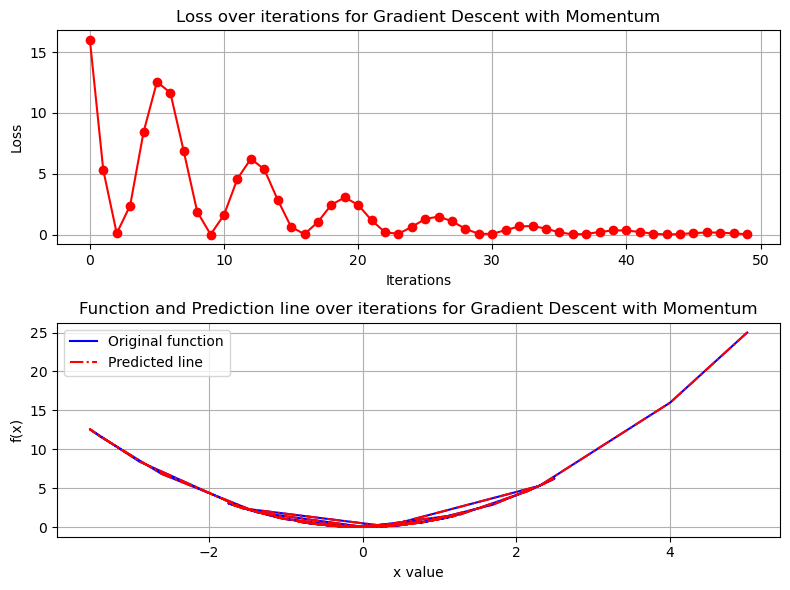

In [72]:

# Hàm số f(x) = x^2
def function(x):
    return x**2

# Gradient của hàm số f(x)
def gradient(x):
    return 2 * x

# Tạo hàm dự đoán từ giá trị x
def predict_line(x):
    return np.array([function(xi) for xi in x])

# Gradient Descent với Momentum
def gradient_descent_momentum(learning_rate=0.1, gamma=0.9, iterations=100):
    x = 5  # Giá trị khởi tạo của x
    history_x = [x]  # Lưu giá trị x sau mỗi iteration
    history_loss = []  # Lưu giá trị loss

    momentum = 0  # Khởi tạo momentum

    for i in range(iterations):
        grad = gradient(x)  # Tính gradient tại x
        momentum = gamma * momentum + learning_rate * grad  # Cập nhật momentum
        x -= momentum  # Cập nhật x dựa trên momentum
        
        history_x.append(x)  # Lưu giá trị x mới
        
        # Tính loss và lưu vào history_loss
        loss = function(x)
        history_loss.append(loss)

    return history_x, history_loss

# Áp dụng Gradient Descent với Momentum
iterations = 50
learning_rate = 0.1
gamma = 0.9

x_history, loss_history = gradient_descent_momentum(learning_rate, gamma, iterations)

# Tạo đường dự đoán từ giá trị của x
predict_line_values = predict_line(x_history)

# Vẽ đồ thị
plt.figure(figsize=(8, 6))

# Đồ thị độ lỗi
plt.subplot(2, 1, 1)
plt.plot(range(len(loss_history)), loss_history, marker='o', linestyle='-', color='red')
plt.title('Loss over iterations for Gradient Descent with Momentum')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.grid(True)

# Đồ thị hàm số f(x)
plt.subplot(2, 1, 2)
plt.plot(x_history, function(np.array(x_history)), linestyle='solid', color='blue', label='Original function')
plt.plot(x_history, predict_line_values, linestyle='-.', color='red', label='Predicted line')
plt.title('Function and Prediction line over iterations for Gradient Descent with Momentum')
plt.xlabel('x value')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


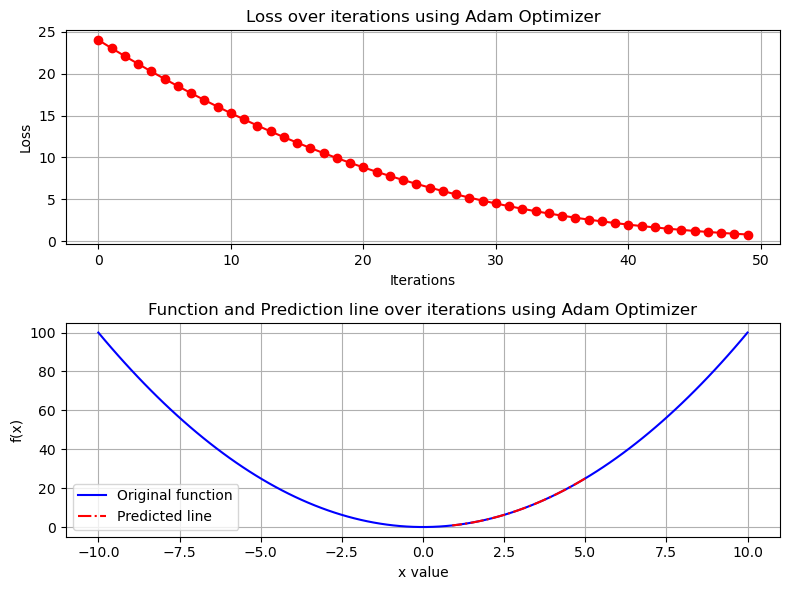

In [73]:
# Hàm số f(x) = x^2
def function(x):
    return x**2

# Gradient của hàm số f(x)
def gradient(x):
    return 2 * x

# Adam Optimizer
def adam_optimizer(learning_rate=0.1, beta1=0.9, beta2=0.999, epsilon=1e-8, iterations=100):
    x = 5  # Giá trị khởi tạo của x
    m = 0  # Trung bình di chuyển đầu tiên
    v = 0  # Trung bình di chuyển thứ hai
    history_x = [x]  # Lưu giá trị x sau mỗi iteration
    history_loss = []  # Lưu giá trị loss

    for i in range(iterations):
        grad = gradient(x)  # Tính gradient tại x

        m = beta1 * m + (1 - beta1) * grad  # Cập nhật trung bình di chuyển đầu tiên
        v = beta2 * v + (1 - beta2) * grad**2  # Cập nhật trung bình di chuyển thứ hai

        m_hat = m / (1 - beta1**(i+1))  # Bias correction cho m
        v_hat = v / (1 - beta2**(i+1))  # Bias correction cho v

        x -= learning_rate * m_hat / (np.sqrt(v_hat) + epsilon)  # Cập nhật x

        history_x.append(x)  # Lưu giá trị x mới

        # Tính loss và lưu vào history_loss
        loss = function(x)
        history_loss.append(loss)

    return history_x, history_loss

# Áp dụng Adam Optimizer
iterations = 50
learning_rate = 0.1
beta1 = 0.9
beta2 = 0.999
epsilon = 1e-8

x_history, loss_history = adam_optimizer(learning_rate, beta1, beta2, epsilon, iterations)

# Vẽ đồ thị
plt.figure(figsize=(8, 6))

# Đồ thị độ lỗi
plt.subplot(2, 1, 1)
plt.plot(range(len(loss_history)), loss_history, marker='o', linestyle='-', color='red')
plt.title('Loss over iterations using Adam Optimizer')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.grid(True)

# Đồ thị hàm số f(x) và đường dự đoán
plt.subplot(2, 1, 2)
x_vals = np.linspace(-10, 10, 100)  # Tạo dải giá trị x để vẽ đường dự đoán
plt.plot(x_vals, function(x_vals), linestyle='solid', color='blue', label='Original function')
plt.plot(x_history, function(np.array(x_history)), linestyle='-.', color='red', label='Predicted line')
plt.title('Function and Prediction line over iterations using Adam Optimizer')
plt.xlabel('x value')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


minh họa Continual Learning bằng thuật toán Incremental Learning:

dữ liệu mới (tập kiểm tra 2) có thể thấp hơn so với dữ liệu huấn luyện ban đầu (tập kiểm tra 1) 
do sự khác biệt trong phân phối của dữ liệu mới

In [5]:
from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split

# Tạo dữ liệu mô phỏng
X1, y1 = make_classification(n_samples=100, n_features=20, n_classes=2, random_state=1)
X2, y2 = make_classification(n_samples=100, n_features=20, n_classes=2, random_state=2)

# Tách dữ liệu thành tập huấn luyện và tập kiểm tra
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

# Khởi tạo mô hình
clf = GradientBoostingClassifier(random_state=42)

# Huấn luyện mô hình trên tập dữ liệu 1
clf.fit(X1_train, y1_train)

# Đánh giá hiệu suất trên tập kiểm tra 1
score_1 = clf.score(X1_test, y1_test)
print(f"Accuracy trên tập kiểm tra 1: {score_1}")

# Tiếp tục huấn luyện mô hình trên tập dữ liệu 2
clf.fit(X2_train, y2_train)

# Đánh giá hiệu suất trên tập kiểm tra 2
score_2 = clf.score(X2_test, y2_test)
print(f"Accuracy trên tập kiểm tra 2 sau khi huấn luyện tiếp: {score_2}")


Accuracy trên tập kiểm tra 1: 0.9
Accuracy trên tập kiểm tra 2 sau khi huấn luyện tiếp: 0.85
